# Homework 09
This homework is based on the classification and regression lectures.

## Question 1
#### In the table below, fill in the definition column with a short (no more than two sentence) definition for each vocab word. If it can be summarized by a formula, give the formula. 

| Vocab Word | Definition |
|:--------|:--------|
| **One-hot coding** |  The process of converting categorical data in a numerical format|
| **Feature selection*** | The process of selecting certain features of the data to construct a model. |
| **Classifier** | A classifier is an algorithm that assigns data points a category based on its features. |
| **Precision** | True positive / (true positive + false positive) |
| **Recall** | True positive / (true positive + false negative) |
| **F1 Score** | (2 x precision x recall)/(precision + recall) |
| **Parsimonious model** | The model that explains data with the fewest parameters while preserving accuracy. |
| **Ridge regression** | A linear regression that adds an L2 penalty. This makes the regression less prone to overfitting. |
| **LASSO regression** | A linear regression that adds an L1 penalty. This removes less important coefficients from the model. |
| **Cross validation** | A technique that splits data into training and testing sets to see how well a model can generalize. |
| **Tree based methods** | Algorithms that segments variables into branches that are tested for accuracy and efficiency. |

*Just give the general idea.

## Question 2 
#### a) What shape does a perfect classifier look like on an ROC curve? What about a bad classifier?
#### b) Think about the formula for an F1 score. What does it mean when the F1 score is close to 1? Close to 0?

a) A perfect shape for a classifier on a ROC curve will be one that hugs the top-left corner. A bad classifer will be in a diagonal line from the origin to 1,1.

b) When an F1 score is close to 1 that measn that precision and recall are high and the model makes few false positives and false negatives. If the F1 score is close to 0, precision and recall is low and the model performing poorly.

## Question 3
#### Compare the following aspects of linear vs. logistic regression.
|  | Linear | Logistic |
|:--------|:--------|:--------|
| **Chart Shape** | Straight Line  | S shaped |
| **Dependent Variable Type** | Continuous | Categorical or Binary/Dichotomous |
| **Purpose** (regression or classification) | Regression | Classification |
| **Range of output variable** ($y_i$ or $p_i$) | Any real value | probability between 0 and 1 |
| **Method*** | OLS | MLE |
| **Example of use** | Prediciting average amount of money people spent on rent based on variables | Prediciting if a patient has a diagnosis |  
  
*Meaning ordinary least squares or maximum likelihood estimation

## Question 4
#### Why is it important to train then test our model? How do we do that? (2-3 sentences. Not looking for code, just general explanation).

It is important to train and test a model to make sure that it is adaptable and useful for different data not just the exampels provided in creation. This ensures that a model is acutally useful in diverse contexts.

## Question 5
This question runs through a linear regression example. We want to predict median house value based on the other variables.
#### a) First, load the `housing.csv` data set. Look at the data in some useful way. Why is linear regression appropriate here?

In [1]:

housing <- read.csv("housing.csv")

head(housing)

summary(housing)

str(housing)


,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,median_house_value
,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<dbl>,<int>
1,-122.23,37.88,41,880,322,126,8.3252,452600
2,-122.22,37.86,21,7099,2401,1138,8.3014,358500
3,-122.24,37.85,52,1467,496,177,7.2574,352100
4,-122.25,37.85,52,1274,558,219,5.6431,341300
5,-122.25,37.85,52,1627,565,259,3.8462,342200
6,-122.25,37.85,52,919,413,193,4.0368,269700


   longitude         latitude     housing_median_age  total_rooms   
 Min.   :-124.3   Min.   :32.54   Min.   : 1.00      Min.   :    2  
 1st Qu.:-121.8   1st Qu.:33.93   1st Qu.:18.00      1st Qu.: 1448  
 Median :-118.5   Median :34.26   Median :29.00      Median : 2127  
 Mean   :-119.6   Mean   :35.63   Mean   :28.64      Mean   : 2636  
 3rd Qu.:-118.0   3rd Qu.:37.71   3rd Qu.:37.00      3rd Qu.: 3148  
 Max.   :-114.3   Max.   :41.95   Max.   :52.00      Max.   :39320  
   population      households     median_income     median_house_value
 Min.   :    3   Min.   :   1.0   Min.   : 0.4999   Min.   : 14999    
 1st Qu.:  787   1st Qu.: 280.0   1st Qu.: 2.5634   1st Qu.:119600    
 Median : 1166   Median : 409.0   Median : 3.5348   Median :179700    
 Mean   : 1425   Mean   : 499.5   Mean   : 3.8707   Mean   :206856    
 3rd Qu.: 1725   3rd Qu.: 605.0   3rd Qu.: 4.7432   3rd Qu.:264725    
 Max.   :35682   Max.   :6082.0   Max.   :15.0001   Max.   :500001    

'data.frame':	20640 obs. of  8 variables:
 $ longitude         : num  -122 -122 -122 -122 -122 ...
 $ latitude          : num  37.9 37.9 37.9 37.9 37.9 ...
 $ housing_median_age: int  41 21 52 52 52 52 52 52 42 52 ...
 $ total_rooms       : int  880 7099 1467 1274 1627 919 2535 3104 2555 3549 ...
 $ population        : int  322 2401 496 558 565 413 1094 1157 1206 1551 ...
 $ households        : int  126 1138 177 219 259 193 514 647 595 714 ...
 $ median_income     : num  8.33 8.3 7.26 5.64 3.85 ...
 $ median_house_value: int  452600 358500 352100 341300 342200 269700 299200 241400 226700 261100 ...


Linear regression is appropriate here becuase the dependent variable in this data set (median_house_value) is a continuous variable.

#### b) Scale data and split it 75/25 training/testing. Set seed = 123.

In [12]:
set.seed(123)

housing_scaled <- as.data.frame(scale(housing))

n <- nrow(housing_scaled)
train_index <- sample(1:n, size = 0.75 * n)
train <- housing_scaled[train_index, ]
test <- housing_scaled[-train_index, ]

#### c) Fit the model.

In [13]:
model <- lm(median_house_value ~ ., data = train)
summary(model)


Call:
lm(formula = median_house_value ~ ., data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.6929 -0.3844 -0.1012  0.2669  7.0686 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)        -0.0008768  0.0048872  -0.179   0.8576    
longitude          -0.7237084  0.0143999 -50.258   <2e-16 ***
latitude           -0.7732900  0.0145054 -53.310   <2e-16 ***
housing_median_age  0.1227835  0.0054735  22.432   <2e-16 ***
total_rooms        -0.0370233  0.0149344  -2.479   0.0132 *  
population         -0.4003812  0.0118345 -33.832   <2e-16 ***
households          0.4767179  0.0165913  28.733   <2e-16 ***
median_income       0.6333746  0.0060701 104.344   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.608 on 15472 degrees of freedom
Multiple R-squared:  0.6285,	Adjusted R-squared:  0.6284 
F-statistic:  3740 on 7 and 15472 DF,  p-value: < 2.2e-16


#### d) Make predictions on test data and show them in an actual vs. predicted plot.

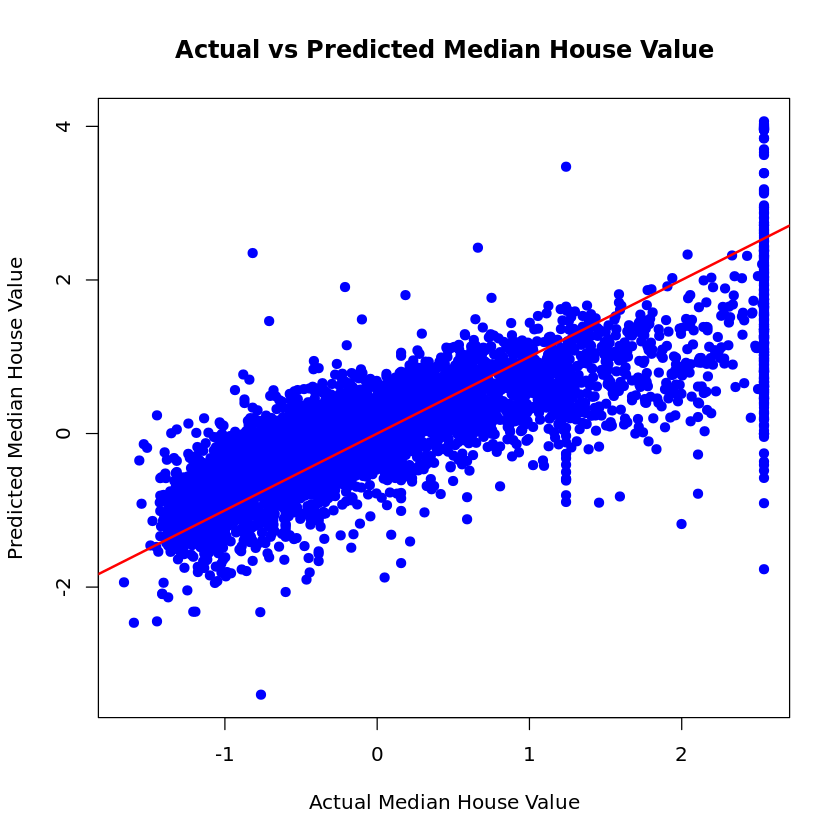

In [15]:
predictions <- predict(model, newdata = test)

plot(test$median_house_value, predictions,
     xlab = "Actual Median House Value",
     ylab = "Predicted Median House Value",
     main = "Actual vs Predicted Median House Value",
     pch = 19, col = "blue")
abline(0, 1, col = "red", lwd = 2)


#### e) Make a residuals plot.

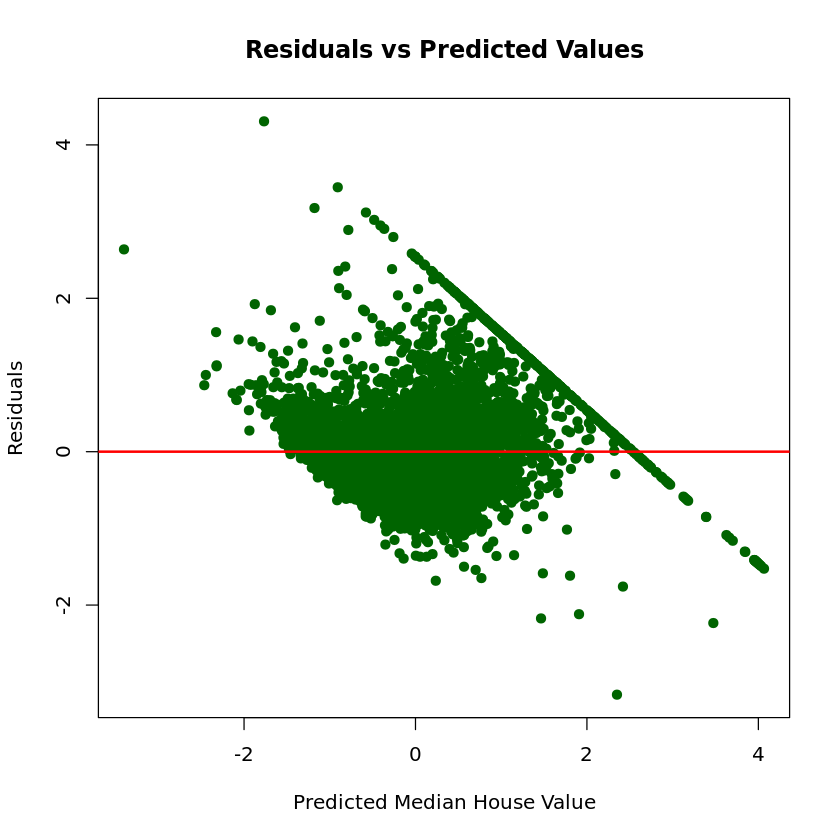

In [16]:
# e) Residuals plot
residuals <- test$median_house_value - predictions

plot(predictions, residuals,
     xlab = "Predicted Median House Value",
     ylab = "Residuals",
     main = "Residuals vs Predicted Values",
     pch = 19, col = "darkgreen")
abline(h = 0, col = "red", lwd = 2)


## Question 6
This question runs through a logistic regression example. We want to predict diabetes diagnosis based on the other variables. 
#### a) First, load the `diabetes.csv` data set. Look at the data in some useful way. Why is logistic regression appropriate here?

In [18]:
diabetes <- read.csv("diabetes.csv")
head(diabetes)
summary(diabetes)
str(diabetes)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<int>
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0
5,0,137,40,35,168,43.1,2.288,33,1
6,5,116,74,0,0,25.6,0.201,30,0


  Pregnancies        Glucose      BloodPressure    SkinThickness  
 Min.   : 0.000   Min.   :  0.0   Min.   :  0.00   Min.   : 0.00  
 1st Qu.: 1.000   1st Qu.: 99.0   1st Qu.: 62.00   1st Qu.: 0.00  
 Median : 3.000   Median :117.0   Median : 72.00   Median :23.00  
 Mean   : 3.845   Mean   :120.9   Mean   : 69.11   Mean   :20.54  
 3rd Qu.: 6.000   3rd Qu.:140.2   3rd Qu.: 80.00   3rd Qu.:32.00  
 Max.   :17.000   Max.   :199.0   Max.   :122.00   Max.   :99.00  
    Insulin           BMI        DiabetesPedigreeFunction      Age       
 Min.   :  0.0   Min.   : 0.00   Min.   :0.0780           Min.   :21.00  
 1st Qu.:  0.0   1st Qu.:27.30   1st Qu.:0.2437           1st Qu.:24.00  
 Median : 30.5   Median :32.00   Median :0.3725           Median :29.00  
 Mean   : 79.8   Mean   :31.99   Mean   :0.4719           Mean   :33.24  
 3rd Qu.:127.2   3rd Qu.:36.60   3rd Qu.:0.6262           3rd Qu.:41.00  
 Max.   :846.0   Max.   :67.10   Max.   :2.4200           Max.   :81.00  
    Outcome  

'data.frame':	768 obs. of  9 variables:
 $ Pregnancies             : int  6 1 8 1 0 5 3 10 2 8 ...
 $ Glucose                 : int  148 85 183 89 137 116 78 115 197 125 ...
 $ BloodPressure           : int  72 66 64 66 40 74 50 0 70 96 ...
 $ SkinThickness           : int  35 29 0 23 35 0 32 0 45 0 ...
 $ Insulin                 : int  0 0 0 94 168 0 88 0 543 0 ...
 $ BMI                     : num  33.6 26.6 23.3 28.1 43.1 25.6 31 35.3 30.5 0 ...
 $ DiabetesPedigreeFunction: num  0.627 0.351 0.672 0.167 2.288 ...
 $ Age                     : int  50 31 32 21 33 30 26 29 53 54 ...
 $ Outcome                 : int  1 0 1 0 1 0 1 0 1 1 ...


Logistic regression is appropriate here because dependent variable (Outcome) is a binary varaiable. 

#### b) Scale data and split it 75/25 training/testing. Set seed = 123.

In [19]:
set.seed(123)

diabetes_scaled <- as.data.frame(scale(diabetes[, -9])) 
diabetes_scaled$Outcome <- diabetes$Outcome

n <- nrow(diabetes_scaled)
train_index <- sample(1:n, size = 0.75 * n)
train <- diabetes_scaled[train_index, ]
test <- diabetes_scaled[-train_index, ]


#### c) Fit the model.

In [20]:

model <- glm(Outcome ~ ., data = train, family = "binomial")
summary(model)



Call:
glm(formula = Outcome ~ ., family = "binomial", data = train)

Coefficients:
                         Estimate Std. Error z value Pr(>|z|)    
(Intercept)              -0.90319    0.11273  -8.012 1.13e-15 ***
Pregnancies               0.39262    0.12637   3.107  0.00189 ** 
Glucose                   1.17671    0.14189   8.293  < 2e-16 ***
BloodPressure            -0.26430    0.11480  -2.302  0.02131 *  
SkinThickness             0.07704    0.12533   0.615  0.53875    
Insulin                  -0.15585    0.11655  -1.337  0.18117    
BMI                       0.67134    0.13611   4.932 8.12e-07 ***
DiabetesPedigreeFunction  0.23841    0.10927   2.182  0.02912 *  
Age                       0.18663    0.12792   1.459  0.14456    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 745.11  on 575  degrees of freedom
Residual deviance: 538.57  on 567  degrees of freedom
AIC: 556.57

Number of

#### d) Make predictions on test data. Print a table with the number of true positives, false positives, true negatives, false negatives, and accuracy. 

In [21]:
probabilities <- predict(model, newdata = test, type = "response")
predicted_classes <- ifelse(probabilities > 0.5, 1, 0)

table(Predicted = predicted_classes, Actual = test$Outcome)

accuracy <- mean(predicted_classes == test$Outcome)
accuracy


         Actual
Predicted   0   1
        0 112  31
        1  13  36

[1] 0.7708333

#### e) Fit a LASSO-regularized logistic regression model. Again, set seed = 123. Which variables are the most important (which ones don't go to zero)? How does the LASSO model affect the accuracy?

In [22]:
# e) LASSO logistic regression
library(glmnet)
set.seed(123)

x_train <- as.matrix(train[, -9])
y_train <- train$Outcome
x_test <- as.matrix(test[, -9])
y_test <- test$Outcome

lasso_model <- cv.glmnet(x_train, y_train, family = "binomial", alpha = 1)
coef(lasso_model, s = "lambda.min")

# Predict and accuracy
lasso_pred_prob <- predict(lasso_model, newx = x_test, s = "lambda.min", type = "response")
lasso_pred_class <- ifelse(lasso_pred_prob > 0.5, 1, 0)
lasso_accuracy <- mean(lasso_pred_class == y_test)
lasso_accuracy


9 x 1 sparse Matrix of class "dgCMatrix"
                                   s1
(Intercept)              -0.876174389
Pregnancies               0.358492638
Glucose                   1.094444717
BloodPressure            -0.191905694
SkinThickness             0.008646508
Insulin                  -0.076249360
BMI                       0.616989900
DiabetesPedigreeFunction  0.199031066
Age                       0.155747780

[1] 0.765625

#### f) Make a plot of actual vs. predicted values for the LASSO model.

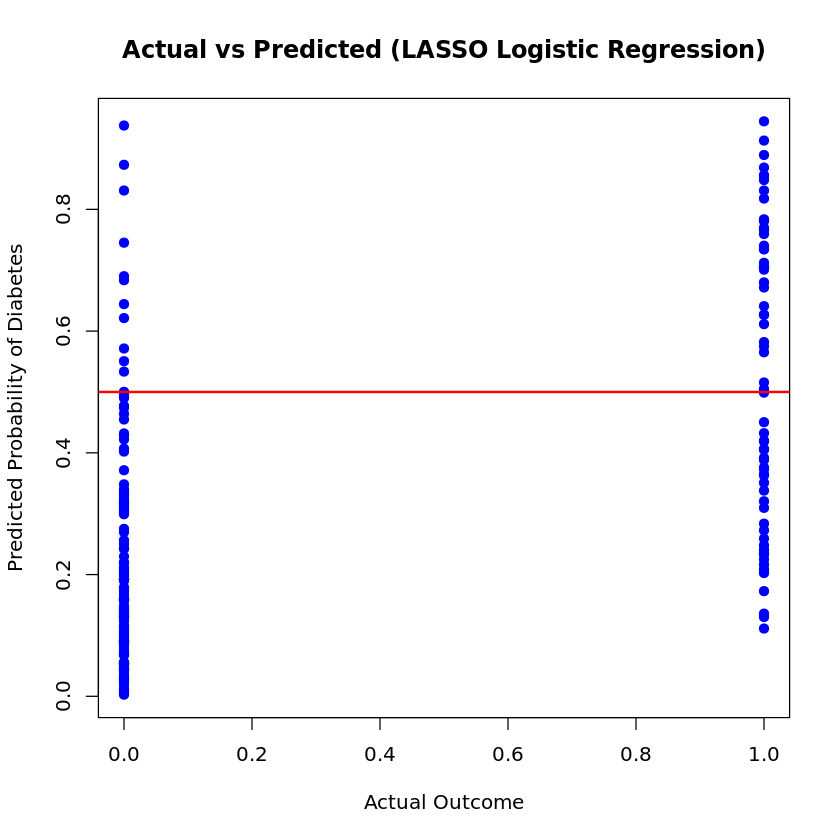

In [23]:

plot(y_test, lasso_pred_prob,
     xlab = "Actual Outcome",
     ylab = "Predicted Probability of Diabetes",
     main = "Actual vs Predicted (LASSO Logistic Regression)",
     pch = 19, col = "blue")
abline(h = 0.5, col = "red", lwd = 2)
